<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [21]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'skillfactory'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [22]:
# Данные для соединения удалены.
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [25]:
# текст запроса
query_3_1 = f'''SELECT 
                     COUNT(id)
                FROM 
                     vacancies
         '''

In [26]:
# результат запроса
vacancies = pd.read_sql_query(query_3_1, connection)
display(vacancies)
display(f'Количество вакансий в базе данных {vacancies.iloc[0]['count']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_12316\1009525420.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies = pd.read_sql_query(query_3_1, connection)


DatabaseError: Execution failed on sql 'SELECT 
                     COUNT(id)
                FROM 
                     vacancies
         ': relation "vacancies" does not exist
LINE 4:                      vacancies
                             ^


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [27]:
# текст запроса
query_3_2 = f'''SELECT 
                     COUNT(id)
                FROM 
                     employers
         '''

In [28]:
# результат запроса
employers = pd.read_sql_query(query_3_2, connection)
display(employers)
display(f'Количество работодателей в базе данных {employers.iloc[0]['count']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_12316\2149703915.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers = pd.read_sql_query(query_3_2, connection)


DatabaseError: Execution failed on sql 'SELECT 
                     COUNT(id)
                FROM 
                     employers
         ': relation "employers" does not exist
LINE 4:                      employers
                             ^


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [ ]:
# текст запроса
query_3_3 = f'''SELECT 
                     COUNT(id)
                FROM 
                     areas
         '''

In [ ]:
# результат запроса
areas = pd.read_sql_query(query_3_3, connection)
display(areas)
display(f'Количество регионов в базе данных {areas.iloc[0]['count']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\3401936556.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas = pd.read_sql_query(query_3_3, connection)


,count
0,1362


'Количество регионов в базе данных 1362'

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [ ]:
# текст запроса
query_3_4 = f'''SELECT 
                     COUNT(id)
                FROM 
                     industries
         '''

In [ ]:
# результат запроса
industries = pd.read_sql_query(query_3_4, connection)
display(industries)
display(f'Количество сфер деятельности в базе данных {industries.iloc[0]['count']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\2538949283.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industries = pd.read_sql_query(query_3_4, connection)


,count
0,294


'Количество сфер деятельности в базе данных 294'

***

выводы по предварительному анализу данных

Имеющаяся база данных достаточно велика, с большим количеством вакансий, работодателей, регионов и сфер деятельности. Объема имеющихся данных достаточно для создания модели машинного обучения, которая будет рекомендовать вакансии клиентам агенств, претендующих на позицию DS.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
query_4_1 = f'''SELECT 
                     a.name,
                     COUNT(v.area_id)
                FROM 
                     areas a
                JOIN 
                     vacancies v ON v.area_id = a.id
                GROUP BY 1
                ORDER BY 2 desc
         '''

In [ ]:
# результат запроса
vacancies_to_areas = pd.read_sql_query(query_4_1, connection)
display(vacancies_to_areas)

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\2126449776.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_to_areas = pd.read_sql_query(query_4_1, connection)


,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
query_4_2 = f'''SELECT 
                     COUNT(id)
                FROM 
                     vacancies
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
         '''

In [ ]:
# результат запроса
vacancies_with_salary = pd.read_sql_query(query_4_2, connection)
display(vacancies_with_salary)
display(f'Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой {vacancies_with_salary.iloc[0]['count']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\1349601260.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_with_salary = pd.read_sql_query(query_4_2, connection)


,count
0,24073


'Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой 24073'

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
# текст запроса
query_4_3 = f'''SELECT 
                     ROUND(AVG(salary_from)) avg_from,
                     ROUND(AVG(salary_to)) avg_to
                FROM 
                     vacancies
         '''

In [ ]:
# результат запроса
avg_salary = pd.read_sql_query(query_4_3, connection)
display(avg_salary)
print(f'Среднее значение нижней границы зарплатной вилки равно {avg_salary.iloc[0]['avg_from']}\nСреднее значение верхней границы зарплатной вилки равно {avg_salary.iloc[0]['avg_to']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\3456031171.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary = pd.read_sql_query(query_4_3, connection)


,avg_from,avg_to
0,71065.0,110537.0


Среднее значение нижней границы зарплатной вилки равно 71065.0
Среднее значение верхней границы зарплатной вилки равно 110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
query_4_4 = f'''SELECT 
                     DISTINCT schedule, employment,
                     COUNT (*)
                FROM 
                     vacancies
                GROUP BY 1, 2
                ORDER BY 3 desc
         '''

In [ ]:
# результат запроса
schedule_employment_count = pd.read_sql_query(query_4_4, connection)
display(schedule_employment_count)

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\191268740.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_employment_count = pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [ ]:
# текст запроса
query_4_5 = f'''SELECT 
                     DiSTINCT experience,
                     COUNT (*)
                FROM 
                     vacancies
                GROUP BY 1
                ORDER BY 2
          '''

In [ ]:
# результат запроса
experience = pd.read_sql_query(query_4_5, connection)
display(experience)

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\312673723.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  experience = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


Text(0.5, 1.0, 'Требуемый опыт работы')

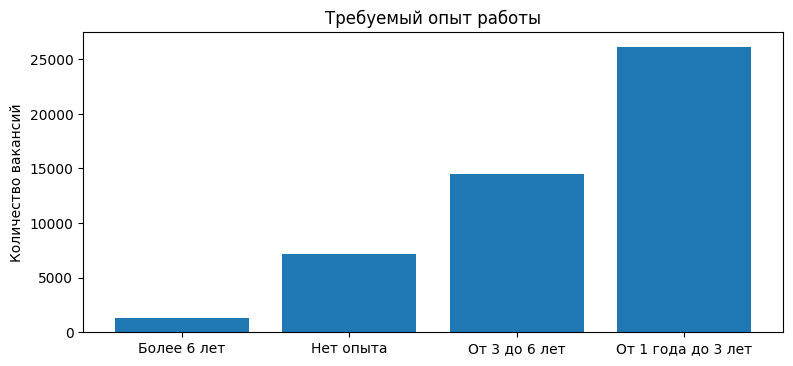

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = experience ['experience'], height = experience['count']);
axes.set_ylabel('Количество вакансий')
axes.set_title('Требуемый опыт работы')

***

выводы по детальному анализу вакансий

Наибольшее количество вакансий представлено для крупных городов - столиц и городов-миллиоников. Чем больше населения в городе(регионе), тем большее количество вакансий в базе. 

В половине случаев работодатели указывают нижнюю или верхнюю границу предлагаемой заработной платы. Разница между средними значениями верхней и нижней границы заработной платы - значительна (более 50%). 

Большинство работодателей ищут сотрудников на полный день с полной занятостью. Однако удаленная работа также набирает популярность. Стажировка и Проектная работа наименее востребованые типы занятости. 

Для работодалей важен опыт работы, основные вакансии требуют опыта от 1 года до 6 лет.


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query_5_1 = f'''(SELECT 
                     e.name,
                     COUNT(v.employer_id)
                FROM 
                     employers e
                JOIN 
                     vacancies v ON v.employer_id = e.id
                GROUP BY 1
                ORDER BY 2 desc
                LIMIT 1)
                
                UNION ALL
                
                (SELECT 
                     e.name,
                     COUNT(v.employer_id)
                FROM 
                     employers e
                JOIN 
                     vacancies v ON v.employer_id = e.id
                GROUP BY 1
                ORDER BY 2 desc
                OFFSET 4 LIMIT 1)  
         '''

In [ ]:
# результат запроса
employers_1_5 = pd.read_sql_query(query_5_1, connection)
display(employers_1_5)
print (f'На первом месте среди работодателей по количеству вакансий находится {employers_1_5.iloc[0]['name']}\nНа пятом месте среди работодателей по количеству вакансий находится {employers_1_5.iloc[1]['name']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\3447536059.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_1_5 = pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Газпром нефть,331


На первом месте среди работодателей по количеству вакансий находится Яндекс
На пятом месте среди работодателей по количеству вакансий находится Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
query_5_2 = f'''SELECT 
                     a.name, 
                     COUNT (DISTINCT e.id) employer,
                     COUNT (DISTINCT v.id) vacancie
                FROM 
                     areas a
                LEFT JOIN
                     employers e on e.area = a.id
                LEFT JOIN
                     vacancies v ON v.area_id = a.id
                WHERE v.id is NULL
                GROUP BY a.id
                ORDER BY 2 desc
            '''

In [ ]:
# результат запроса
count_employer_vacancies = pd.read_sql_query(query_5_2, connection)
display(count_employer_vacancies)
display(f'Регионом, в котором нет вакансий, но больше всего работодателей является {count_employer_vacancies.iloc[0]['name']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\207823075.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_employer_vacancies = pd.read_sql_query(query_5_2, connection)


,name,employer,vacancie
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


'Регионом, в котором нет вакансий, но больше всего работодателей является Россия'

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса
query_5_3 = f'''SELECT 
                     e.name,
                     COUNT (DISTINCT v.area_id) 
                FROM 
                     employers e
                JOIN
                     vacancies v on v.employer_id = e.id
                GROUP BY e.name
                ORDER BY 2 desc
            '''

In [ ]:
# результат запроса
count_areas = pd.read_sql_query(query_5_3, connection)
display(count_areas)

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\2673866701.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_areas = pd.read_sql_query(query_5_3, connection)


,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [ ]:
# текст запроса
query_5_4 = f'''SELECT
                     COUNT (*) 
                FROM 
                     employers e
                LEFT JOIN 
                     employers_industries ei ON e.id = ei.employer_id
                WHERE ei.industry_id is NULL
            '''

In [ ]:
# результат запроса
not_industries = pd.read_sql_query(query_5_4, connection)
display(not_industries)
display(f'У {not_industries.iloc[0]['count']} работодателей не указана сфера деятельности')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\3065076959.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  not_industries = pd.read_sql_query(query_5_4, connection)


,count
0,8419


'У 8419 работодателей не указана сфера деятельности'

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:
# текст запроса
query_5_5 = f'''SELECT
                     e.name 
                FROM 
                     employers e
                LEFT JOIN 
                     employers_industries ei ON e.id = ei.employer_id
                GROUP BY 1
                HAVING COUNT(ei.industry_id) = 4
                ORDER BY 1
                OFFSET 2 LIMIT 1
            '''

In [ ]:
# результат запроса
for_industries = pd.read_sql_query(query_5_5, connection)
display(for_industries)
display(f'На третьем месте по алфавиту среди компаний, у которых указано 4 сферы деятельности находится компания {for_industries.iloc[0]['name']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\1113593487.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  for_industries = pd.read_sql_query(query_5_5, connection)


,name
0,2ГИС


'На третьем месте по алфавиту среди компаний, у которых указано 4 сферы деятельности находится компания 2ГИС'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:
# текст запроса
query_5_6 = f'''SELECT
                     COUNT (*) 
                FROM 
                     employers e
                LEFT JOIN 
                     employers_industries ei ON e.id = ei.employer_id
                LEFT JOIN 
                     industries i ON i.id = ei.industry_id
                WHERE i.name = 'Разработка программного обеспечения'
            '''

In [ ]:
# результат запроса
cpecific_industries = pd.read_sql_query(query_5_6, connection)
display(cpecific_industries)
display(f'У {cpecific_industries.iloc[0]['count']}работодателей в качестве сферы деятельности указана Разработка программного обеспечения')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\4259416822.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cpecific_industries = pd.read_sql_query(query_5_6, connection)


,count
0,3553


'У 3553работодателей в качестве сферы деятельности указана Разработка программного обеспечения'

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [ ]:
# код для получения списка городов-милионников
# Импортируем библиотеки
import requests
from bs4 import BeautifulSoup

url='https://ru.wikipedia.org/wiki/Города-миллионеры_России'
# Выполняем запрос, присваиваем переменной содержимое ответа
response=requests.get(url)
# Создаем объект BeautifulSoup
page=BeautifulSoup(response.text,'html.parser')

cities_here=str(page.find('table', class_="standard"))
# Получаем строки таблицы
cities_here=cities_here.split('title="')[3:]

cities=[]
# циклом добавляем города в список
for i in cities_here:
    cities.append(i.split('">')[0])
# преобразуем список в кортеж
cities_tup = tuple(cities)

In [ ]:
# текст запроса
query_5_7 = f'''WITH temp AS(
                SELECT
                     a.name,
                     COUNT (*) cnt
                FROM 
                     vacancies v
                LEFT JOIN 
                     areas a ON a.id = v.area_id
                LEFT JOIN 
                     employers e ON e.id = v.employer_id
                WHERE e.name = 'Яндекс'
                      AND a.name in {cities_tup}
                GROUP BY 1
                ORDER BY 2
               )
                SELECT *  FROM temp
                UNION ALL
                SELECT 
                     'Total', 
                     sum(cnt)  
                FROM temp'''

In [ ]:
# результат запроса
yandex_vacancies = pd.read_sql_query(query_5_7, connection)
display(yandex_vacancies)
display(f'Яндекс разместил {yandex_vacancies.iloc[16]['cnt']} вакансий в городах-миллионниках')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\3669341602.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yandex_vacancies = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


'Яндекс разместил 485.0 вакансий в городах-миллионниках'

***

выводы по анализу работодателей
Крупные компании размещают большое количество вакансий. Им требуются сотрудники в разных регионах, возможно на удаленную работу. 

Значительное количество вакансий размещено для крупных городов - у Яндекса из 1933 вакансий 485 в городах-миллионниках. 

У 410 работодателей указан регион Россия, это значит, что такие компании имеют представительства в раздичных регионах, в которых и размещают свои вакансии. Россия указана для того, чтобы не регистрировать филиал в кажжом регионе. 

Работодатели не всегда добросовестно подходят к заполнению всех данных о себе и о вакансии, например не вказывают сферу деятельности компании (8419 компаний). Это может сузить для них круг потенциальных кандидатов, так как их данные при поиске вакансий по конкретным сферам деятельности не попадут в выборку.

3553 компании (около 15% от всех работодателей) занимаются программным обеспечением. Это значиталельная доля, которая может говорить о том, что разработчики ПО востребованы на рынке труда.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:
# текст запроса
query_6_1 = f'''SELECT 
                     COUNT (*)
                FROM 
                     vacancies
                WHERE (lower(name) LIKE '%data%') OR lower(name) LIKE '%данн%'
          '''

In [ ]:
# результат запроса
count_ds_vacancies = pd.read_sql_query(query_6_1, connection)
display(count_ds_vacancies)
display(f'{count_ds_vacancies.iloc[0]['count']} вакансия имеет отношение к данным')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\1341599923.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_ds_vacancies = pd.read_sql_query(query_6_1, connection)


,count
0,1771


'1771 вакансия имеет отношение к данным'

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
# текст запроса
query_6_2 = f'''SELECT 
                     COUNT (v.name)
                FROM 
                     vacancies v
                WHERE 
                    (
                     (name ILIKE '%data scientist%') 
                     OR (name ILIKE '%data science%')
                     OR(name ILIKE '%исследователь данных%')
                     OR((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
                     OR(name ILIKE '%machine learning%')
                     OR(name ILIKE '%машинн%обучен%')
                     AND (key_skills IS NOT NULL)
                     )
                     AND 
                     (
                     (name ILIKE '%junior%')
                     OR(v.experience ILIKE '%Нет опыта%')
                     OR(v.employment ILIKE '%Стажировка%')
                     )
          '''

In [ ]:
# результат запроса
count_data_junior = pd.read_sql_query(query_6_2, connection)
display(count_data_junior)
display(f'В базе размещена {count_data_junior.iloc[0]['count']} подходящая вакансия для начинающего дата-сайентиста')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\961912405.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_data_junior = pd.read_sql_query(query_6_2, connection)


,count
0,51


'В базе размещена 51 подходящая вакансия для начинающего дата-сайентиста'

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
query_6_3 = f'''SELECT 
                     COUNT (v.name)
                FROM 
                     vacancies v
                WHERE 
                    (
                     name ILIKE '%data scientist%' 
                     OR name ILIKE '%data science%'
                     OR name ILIKE '%исследователь данных%'
                     OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                     OR name ILIKE '%machine learning%'
                     OR name ILIKE '%машинн%обучен%'
                     )
                     AND 
                     (
                     v.key_skills ILIKE '%SQL%'
                     OR v.key_skills ILIKE '%postgres%'
                     )
             '''

In [ ]:
# результат запроса
count_sql_postgres = pd.read_sql_query(query_6_3, connection)
display(count_sql_postgres)
display(f'В базе размещена {count_sql_postgres.iloc[0]['count']} вакансия для DS, в которых в качестве ключевого навыка указан SQL или postgres')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\1208742663.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_sql_postgres = pd.read_sql_query(query_6_3, connection)


,count
0,201


'В базе размещена 201 вакансия для DS, в которых в качестве ключевого навыка указан SQL или postgres'

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
query_6_4 = f'''SELECT 
                     COUNT (name)
                FROM 
                     vacancies
                WHERE 
                    (
                     name ILIKE '%data scientist%' 
                     OR name ILIKE '%data science%'
                     OR name ILIKE '%исследователь данных%'
                     OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                     OR name ILIKE '%machine learning%'
                     OR name ILIKE '%машинн%обучен%'
                     )
                     AND 
                     (
                     key_skills ILIKE '%python%'
                     )
             '''

In [ ]:
# результат запроса
count_python = pd.read_sql_query(query_6_4, connection)
display(count_python)
display(f'В базе размещена {count_python.iloc[0]['count']} вакансия для DS, в которых в качестве ключевого навыка указан Python')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\81940867.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_python = pd.read_sql_query(query_6_4, connection)


,count
0,351


'В базе размещена 351 вакансия для DS, в которых в качестве ключевого навыка указан Python'

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# текст запроса
query_6_5 = f'''SELECT 
                     ROUND(AVG(LENGTH(v.key_skills) - LENGTH(REPLACE(v.key_skills,CHR(9),''))+1),2) count
                FROM 
                     vacancies v
                WHERE 
                    (
                     name ILIKE '%data scientist%' 
                     OR name ILIKE '%data science%'
                     OR name ILIKE '%исследователь данных%'
                     OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                     OR name ILIKE '%machine learning%'
                     OR name ILIKE '%машинн%обучен%'
                     )
             '''

In [ ]:
# результат запроса
avg_key_skills = pd.read_sql_query(query_6_5, connection)
display(avg_key_skills)
display(f'В вакансиях DS в среднем указывают {avg_key_skills.iloc[0]['count']} ключевых навыков')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\1012492622.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_key_skills = pd.read_sql_query(query_6_5, connection)


,count
0,6.41


'В вакансиях DS в среднем указывают 6.41 ключевых навыков'

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# текст запроса
query_6_6 = f'''SELECT 
                     DISTINCT v.experience,
                     ROUND(AVG(coalesce((v.salary_from + v.salary_to)/2, salary_from, salary_to))) salary
                FROM 
                     vacancies v
                WHERE 
                    (
                     name ILIKE '%data scientist%' 
                     OR name ILIKE '%data science%'
                     OR name ILIKE '%исследователь данных%'
                     OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                     OR name ILIKE '%machine learning%'
                     OR name ILIKE '%машинн%обучен%'
                     )
                    AND
                     (
                     salary_from IS NOT NULL OR salary_to IS NOT NULL
                     )
                GROUP BY 1
            '''

In [ ]:
# результат запроса
salary_ds = pd.read_sql_query(query_6_6, connection)
display(salary_ds)
display(f'Средняя заработная плата, указываемая в вакансиях для специалистов DS, с опытом работы от 3 до 6 лет равна {salary_ds.iloc[2]['salary']}')

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\3169362890.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_ds = pd.read_sql_query(query_6_6, connection)


,experience,salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


'Средняя заработная плата, указываемая в вакансиях для специалистов DS, с опытом работы от 3 до 6 лет равна 243115.0'

Text(0.5, 1.0, 'Распределение размера средней зп в зависимости от опыта')

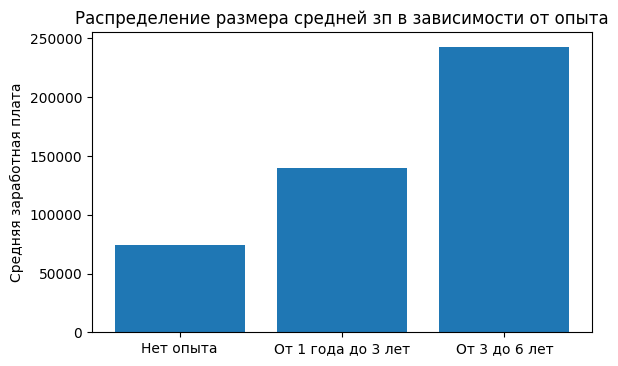

In [ ]:
fig = plt.figure(figsize=(5, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = salary_ds ['experience'], height = salary_ds['salary']);
axes.set_ylabel('Средняя заработная плата')
axes.set_title('Распределение размера средней зп в зависимости от опыта')

***

выводы по предметному анализу

Количество вакансий, имеющих отношений к данным достаточное количество (1771), это 3,5% от общего количества вакансий, но сюда могли попасть вакансии и на другие специальности - администратор базы данных, дата-инженер и т.д. Таким образом, полученная цифра не отражает раельного количества вакансий DS.

Всего лишь в 51 из них требуется специалист уровня Junior. Это очень маленькой количество, а конкуренция на эту позицию высокая.

Специалисты DS по запросу работодателей должны владеть в среднем шестью ключевыми навыками. Но среди этих навыков SQL, Python, postgres встречаются не часто. Возможно это связано с тем, что работодатели подразумевают владение этими навыками для специалиста DS само собой разумеющимся и поэтому не указывают их.

Средняя заработная плата специалистов DS растет с увеличением требуемого опыта. У специалиста без опыта она уже высокая (74643), что выше чем средняя зп в России. При этом заработная плата специалиста с опытом от 3 до 6 лет  еще более чем в три раза выше - 243115.

# Общий вывод по проекту

подведем итог исследования, обобщите выводы
здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

1. Найдем 10 первых вакансий по количеству размещений в базе и количеству работотаделей их разместивших.

In [ ]:
query_7_1 = f'''SELECT 
                     v.name,
                     COUNT (v.id) vacancie,
                     COUNT (DISTINCT v.employer_id) employer
                FROM 
                     vacancies v
                GROUP BY v.name
                ORDER BY 2 DESC
                LIMIT 10
            '''
top_10_employer_vacancies = pd.read_sql_query(query_7_1, connection)
top_10_employer_vacancies

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\2484244185.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_10_employer_vacancies = pd.read_sql_query(query_7_1, connection)


,name,vacancie,employer
0,Системный администратор,1761,1457
1,Программист 1С,1153,850
2,Бизнес-аналитик,488,392
3,Специалист технической поддержки,457,339
4,Системный аналитик,432,269
5,Аналитик,404,305
6,Инженер-программист,389,339
7,Программист 1C,360,281
8,Frontend-разработчик,242,183
9,Инженер технической поддержки,230,149


2. Найдем 10 первых сфер деятельности по количеству размещенных вакансий и ратоботодателей их разместивших.

In [ ]:
query_7_2 = f'''SELECT 
                     i.name,
                     COUNT (v.id) vacancie,
                     COUNT (DISTINCT ei.employer_id) employer
                FROM 
                     vacancies v
                LEFT JOIN
                     employers_industries ei on ei.employer_id = v.employer_id
                LEFT JOIN
                     industries i ON i.id = ei.industry_id
                GROUP BY 1
                ORDER BY 2 DESC
                LIMIT 10
            '''
top_10_industries_vacancies = pd.read_sql_query(query_7_2, connection)
top_10_industries_vacancies

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\2259149407.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_10_industries_vacancies = pd.read_sql_query(query_7_2, connection)


,name,vacancie,employer
0,Разработка программного обеспечения,12499,2592
1,"Системная интеграция, автоматизации технологи...",11034,2160
2,None,10084,0
3,"Интернет-компания (поисковики, платежные систе...",6413,1157
4,Банк,2742,200
5,Мобильная связь,1585,105
6,Кадровые агентства,1143,271
7,Консалтинговые услуги,1137,435
8,Интернет-провайдер,1095,123
9,Розничная сеть (продуктовая),1034,284


3. Найдем 10 первых сфер деятельности по количеству размещенных вакансий для специалистов DS.

In [ ]:
query_7_3 = f'''SELECT 
                     i.name,
                     COUNT (v.id)
                FROM 
                     vacancies v
                LEFT JOIN
                     employers_industries ei on ei.employer_id = v.employer_id
                LEFT JOIN
                     industries i ON i.id = ei.industry_id
                WHERE 
                    (
                     v.name ILIKE '%data scientist%' 
                     OR v.name ILIKE '%data science%'
                     OR v.name ILIKE '%исследователь данных%'
                     OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
                     OR v.name ILIKE '%machine learning%'
                     OR v.name ILIKE '%машинн%обучен%'
                     )
                GROUP BY 1
                ORDER BY 2 DESC
                LIMIT 10
             '''
top_10_industries_DS = pd.read_sql_query(query_7_3, connection)
top_10_industries_DS

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\1922157507.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_10_industries_DS = pd.read_sql_query(query_7_3, connection)


,name,count
0,Разработка программного обеспечения,148
1,"Системная интеграция, автоматизации технологи...",139
2,Банк,92
3,"Интернет-компания (поисковики, платежные систе...",79
4,None,62
5,Мобильная связь,23
6,"Маркетинговые, рекламные, BTL, дизайнерские, E...",22
7,"Управляющая, инвестиционная компания (управлен...",21
8,Консалтинговые услуги,16
9,Фиксированная связь,13


4. Найдем 10 первых регионов по количеству размещенных вакансий для специалистов DS.

In [ ]:
query_7_4 = f'''SELECT 
                     a.name,
                     COUNT (v.id)
                FROM 
                     vacancies v
                LEFT JOIN
                     areas a on a.id = v.area_id
                WHERE 
                    (
                     v.name ILIKE '%data scientist%' 
                     OR v.name ILIKE '%data science%'
                     OR v.name ILIKE '%исследователь данных%'
                     OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
                     OR v.name ILIKE '%machine learning%'
                     OR v.name ILIKE '%машинн%обучен%'
                     )
                GROUP BY 1
                ORDER BY 2 DESC
                LIMIT 10
             '''
top_10_areas_DS = pd.read_sql_query(query_7_4, connection)
top_10_areas_DS

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\1053656956.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_10_areas_DS = pd.read_sql_query(query_7_4, connection)


,name,count
0,Москва,217
1,Санкт-Петербург,64
2,Новосибирск,23
3,Нижний Новгород,20
4,Казань,16
5,Алматы,16
6,Минск,9
7,Томск,8
8,Екатеринбург,7
9,Армения,6


5. Распределение графиков работы в вакансиях для специалистов DS

In [ ]:
query_7_5 = f'''SELECT 
                     DISTINCT schedule,
                     COUNT (*)
                FROM 
                     vacancies v
                WHERE 
                    (
                     v.name ILIKE '%data scientist%' 
                     OR v.name ILIKE '%data science%'
                     OR v.name ILIKE '%исследователь данных%'
                     OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
                     OR v.name ILIKE '%machine learning%'
                     OR v.name ILIKE '%машинн%обучен%'
                     )
                GROUP BY 1
                ORDER BY 2 DESC
             '''
schedule_DS = pd.read_sql_query(query_7_5, connection)
schedule_DS

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\875721947.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_DS = pd.read_sql_query(query_7_5, connection)


,schedule,count
0,Полный день,322
1,Удаленная работа,115
2,Гибкий график,43


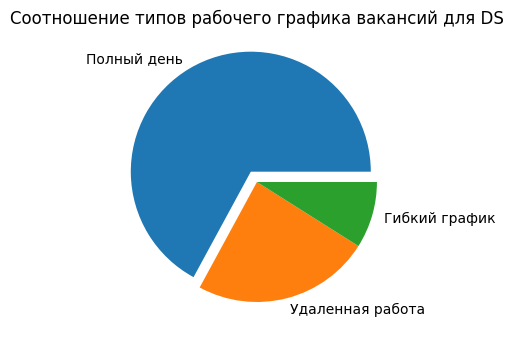

In [ ]:
# Преобразуем Data_Frame в словарь
schedule_dict = schedule_DS.to_dict()
# Инициализируем новый словарь
new_dict = {}
# С помощью цикла извлекаем ключи и их значения из вложенного словаря в новый словарь
for i in schedule_dict.values():
     for key, value in i.items():
         new_dict[key]=value
# Преобразуем словарь в объект Series, чтобы посторить круговую диаграмму
schedule_series = pd.Series(new_dict)
fig = plt.figure(figsize = (3,3))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    schedule_series, 
    labels = ('Полный день', 'Удаленная работа', 'Гибкий график'),
    explode = [0.1,0,0] 
    )
axes.set_title('Соотношение типов рабочего графика вакансий для DS');

6. Распределение типов трудоустройств в вакансиях для специалистов DS

In [ ]:
query_7_6 = f'''SELECT 
                     DISTINCT employment,
                     COUNT (*)
                FROM 
                     vacancies v
                WHERE 
                    (
                     v.name ILIKE '%data scientist%' 
                     OR v.name ILIKE '%data science%'
                     OR v.name ILIKE '%исследователь данных%'
                     OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
                     OR v.name ILIKE '%machine learning%'
                     OR v.name ILIKE '%машинн%обучен%'
                     )
                GROUP BY 1
                ORDER BY 2 DESC
             '''
employment_DS = pd.read_sql_query(query_7_6, connection)
employment_DS

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\2490230615.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employment_DS = pd.read_sql_query(query_7_6, connection)


,employment,count
0,Полная занятость,466
1,Частичная занятость,8
2,Стажировка,4
3,Проектная работа,2


7. Найдем 10 первых регионов по наибольшей средней заработной плате для специалистов DS.

In [ ]:
query_7_7 = f'''SELECT 
                     a.name,
                     ROUND(AVG(coalesce((v.salary_from + v.salary_to)/2, salary_from, salary_to))) avg_salary
                FROM 
                     vacancies v
                LEFT JOIN
                     areas a on a.id = v.area_id
                WHERE 
                    (
                     v.name ILIKE '%data scientist%' 
                     OR v.name ILIKE '%data science%'
                     OR v.name ILIKE '%исследователь данных%'
                     OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
                     OR v.name ILIKE '%machine learning%'
                     OR v.name ILIKE '%машинн%обучен%'
                     )
                     AND
                     (
                     salary_from IS NOT NULL OR salary_to IS NOT NULL
                     )
                GROUP BY 1
                ORDER BY 2 DESC
                LIMIT 10
             '''
top_10_areas_salary_DS = pd.read_sql_query(query_7_7, connection)
top_10_areas_salary_DS

C:\Users\Настенька\AppData\Local\Temp\ipykernel_17980\47532657.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_10_areas_salary_DS = pd.read_sql_query(query_7_7, connection)


,name,avg_salary
0,Кипр,300000.0
1,Армения,268863.0
2,Черногория,233794.0
3,Турция,233794.0
4,Сербия,233794.0
5,Москва,207630.0
6,Белгород,200000.0
7,Санкт-Петербург,173335.0
8,Новосибирск,166333.0
9,Рязань,136667.0


Лидирующие позиции по количеству вакансий занимают профессии, связанные с программным обеспечением, его разработкой, технической поддержкой и аналитикой. Среди сфер деятельности, для которых размещено большее количество вакансий также лидируют разработка программного обеспечения, системная интеграция и автоматизация технологических процессов. Это говорит о том, что эти динамично развивающиеся сферы требуют новых сотрудников.

Логично, что сферы максимально близкие к разработке ПО, размещают наибольшее количество вакансий для DS.

Так же лидерами по количеству вакансий для DS являются крупные города. Кроме того, что в них просто больше население и работает большее количество компаний, естественно и то, что технологические компании размещают свои офисы в крупных городах.

Большинство вакансий для DS соискателю предлагается работа на полный рабочий день с полной занятостью. Но удаленная работа и гибкий график так же имеют место быть.

Наибольшую среднюю заработную плату в вакансиях для DS предлагают зарубежные работодатели. Но скорее всего это единичные вакансии, возможно с удаленной формой занятости. Среди российский регионов лидирует Москва и другие крупные города.